## Libraries

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set()
%matplotlib inline

## Data

In [261]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Processing

In [262]:
# data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [263]:
# Null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [264]:
df['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

In [265]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

<Figure size 1500x700 with 0 Axes>

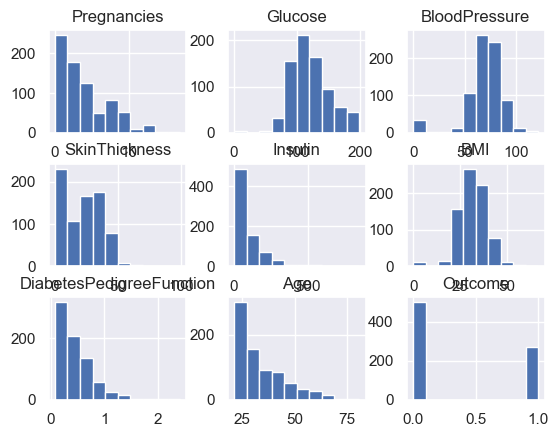

In [266]:
plt.figure(figsize=(15,7))
df.hist()

In [267]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## Train Test Split

In [268]:
from sklearn.utils import resample

In [269]:
ones = df[df['Outcome'] == 1] 
zeros = df[df['Outcome'] == 0] 

In [250]:
ones = resample(ones, n_samples=500, replace=True, stratify=ones)

In [251]:
df = pd.concat([zeros, ones])
df = df.sample(frac=1, replace=False)

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [272]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

## Model

In [273]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')

In [274]:
sv = SVC()
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [275]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [276]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [277]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [278]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


c:\Users\Shahjahan.DESKTOP-MBDJTPL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Save Model

In [279]:
import joblib

In [280]:
joblib.dump(classifier, 'diabetes_model.pkl')
  
# Load the model from the file
model = joblib.load('diabetes_model.pkl')

In [297]:
a = np.array([5,130,82,0,0,39.1,0.956,37]).reshape(1,-1)
model.predict(a)

c:\Users\Shahjahan.DESKTOP-MBDJTPL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [305]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
394,4,158,78,0,0,32.9,0.803,31,1
